# Заглянем глубже: наивная байесовская классификация

*Наивные байесовские модели* - группа исключительно быстрых и простых алгоритмов классификации, зачастую подходящих для наборов данных очень высоких размерностей.

## Байесовская классификация
Наивные баейесовские классификаторы основаны на баейесовских методах классификации, в основе которых лежит теорема Байеса - уравнение, описывающее связи условных вероятностей статистических велечин.
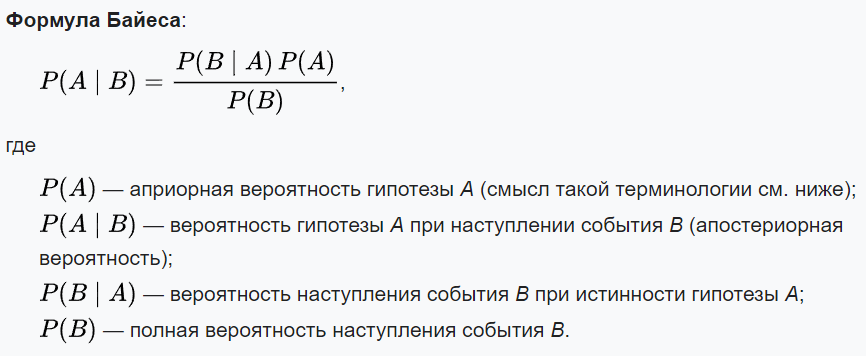
В баейесовской классификации нас интересует поиск вероятности метки (категории) при определенных заданных признаках, являющихся результатами наблюдений \ экспериментов, обозначенной **P(L | признаков)**. Теорема Байеса позволяет это выразить в терминах велечин, которые мы можем вычислить напрямую:
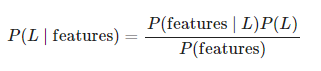
Один из способов выбора между двумя метками (L1 и L2) - вычислить отношение апостериорных вероятностей для каждой из них:
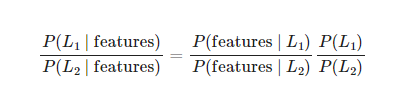

Все, что нам теперь нужно - модель, с помощью которой можно было бы вычислить **P(признаков | L**i) для каждой из меток. Подобная модель называется *порождающей моделью* (generative model), поскольку определяет гипотетический случайный процесс генерации данных. Задание порождающей модели для каждой из меток \ категорий - основа обучения подобного байесовского классификатора. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Гауссов наивный байесовский классификатор
В этом классификаторе допущение состоит в том, что данные *данные всех категорий взяты из простого нормального распределения*.

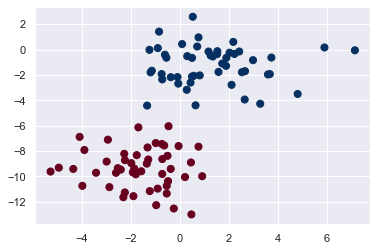

In [2]:
# Данные для наивного байесовского классификатора
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Для этой модели достаточно найти среднее значение и стандартное отклонение точек внутри каждой категории.
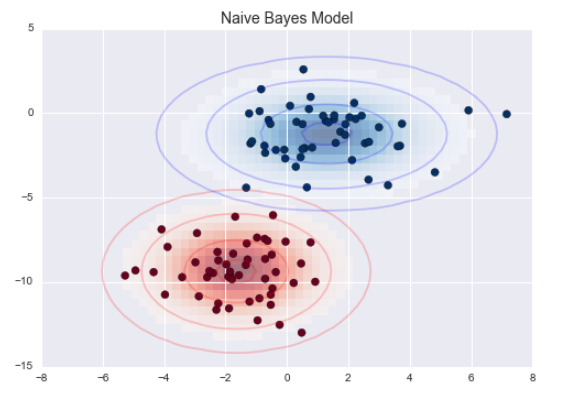
Эллипсы представляют Гауссову порождающую модель для каждой из меток с ростом вероятности по мере приблежения к центру. С помощью этой порожающей модели для каждого класса мы можем легко вычислить вероятность для каждой точки данных.

In [5]:
# Генерируем новые данные и выполним предсказанные метки:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

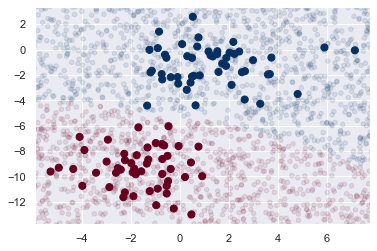

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [8]:
# естественная вероятностная классификация
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Полиномиальный наивный байесовский классификатор
*Лучше всего подходит для признаков, отражающих количество или частоту вхождения.*
#### Пример: классификация текста.
Воспользуемся разреженными признаками количеств слов из корпуса текста 20 Newsgroups ("20 дискуссионных групп").

In [11]:
# Изучим целевые названия:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
# Для простоты выберем несколько из категории, скачаем обучающую и контрольную последовательности:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [17]:
# Образец записи из набора данных:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Чтобы использовать эти данные для машинного обучения, необходимо преобразовать содержимое каждой строчки в числовой вектор. Для этого воспользуемся векторизатором **TF-IDF** и создадим конвейер, присоединяющий его последовательно к полиномиальному наивному байесовскому классификатору:

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [19]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Теперь, предсказав метки для контрольных данных, мы изучим их, чтобы выяснить эффективность работы оценивателя.

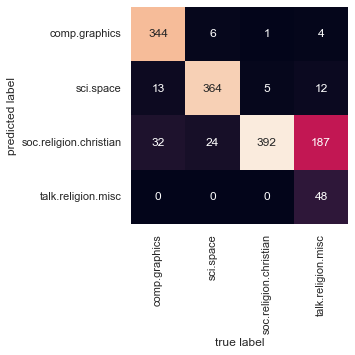

In [20]:
# Матрица различий между настоящими и предсказанными метками для контрольных данных:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

У нас есть инструмент определения категории для любой строки с помощью метода **predict()** нашего конвейера.

In [21]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [22]:
predict_category('sending a payload to the ISS')

'sci.space'

In [23]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [37]:
predict_category('determining the screen resolution')

'comp.graphics'

## Когда имеет смысл использовать наивный байесовский классификатор
Байесовские классификаторы обычно работают хуже чем более сложные модели. Есть и достоинства:
1. Они выполняют как обучение, так и предсказание исключительно быстро;
2. Обеспечивают простое вероятностное предсказание;
3. Их результаты часто очень легки для интерпретации;
4. У них очень мало (если таковы имеются) настраиваемых параметров.

Итог - подходят для первоначальной классификации.

Наивные байесовские классификаторы склонны демонстрировать особенно хорошие результаты в следующих случаях:
1. Когда данные действительно соответствуют наивным допущениям (редко);
2. Для очень хорошо разделяемых категорий, когда сложность модели не столь важна;
3. Для данных с очень большим числом измерений, когда сложность модели не столь важна.


